<a href="https://colab.research.google.com/github/yuriall/ML/blob/main/02_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0,
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0,
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8,
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0,
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0,
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7,
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

In [2]:
import numpy as np

In [4]:
fish_data = np.column_stack((fish_length, fish_weight))

# 처음 데이터 5개 확인해보기
print(fish_data[:5])

[[ 25.4 242. ]
 [ 26.3 290. ]
 [ 26.5 340. ]
 [ 29.  363. ]
 [ 29.  430. ]]


In [5]:
#ones(), zeros() 함수를 사용하여 target 데이터 만들기
fish_target= np.concatenate((np.ones(35), np.zeros(14)))

In [6]:
from sklearn.model_selection import train_test_split

In [8]:
train_input, test_input, train_target, test_target = train_test_split(fish_data, fish_target, stratify = fish_target, random_state=42)

# 적절하게 섞였는지 출력
print(test_target)

[0. 0. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1.]


In [9]:
#도미 데이터를 넣고 결과 예측하기
from sklearn.neighbors import KNeighborsClassifier
kn=KNeighborsClassifier()
kn.fit(train_input, train_target)
kn.score(test_input, test_target)

print(kn.predict([[25,150]]))

# 오류 발생 -> 해당 데이터를 도미(1)로 예측해야 하는 데이터임

[0.]


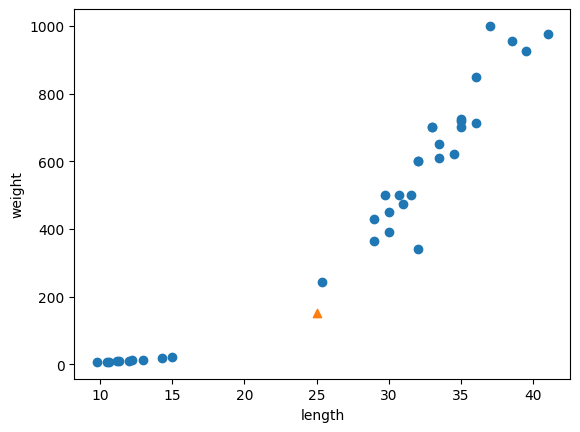

In [10]:
#시각적으로 확인하기 위해 산점도 생성
import matplotlib.pyplot as plt
plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(25, 150, marker='^') #매개변수 모양 지정
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

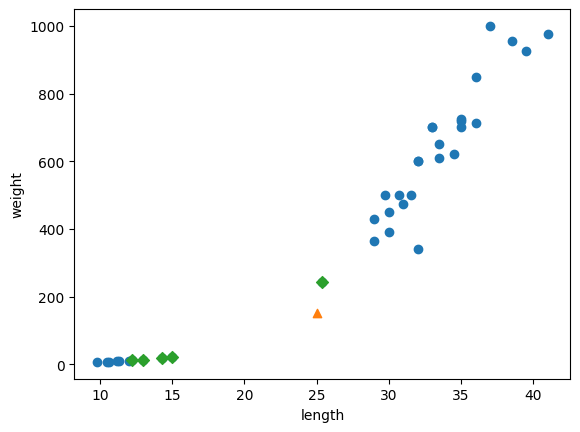

In [12]:
distances, indexes = kn.kneighbors([[25,150]])

# indexes  배열을 사용해서 훈련 데이터 중에서 이웃 샘플을 따로 구분하여 그리기
plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(25, 150, marker='^') #매개변수 모양 지정
plt.scatter(train_input[indexes,0], train_input[indexes, 1], marker='D')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [14]:
# 이웃 데이터(초록색)를 직접 확인
print(train_input[indexes])

# 이웃 데이터들과의 거리 확인
print(distances)

[[[ 25.4 242. ]
  [ 15.   19.9]
  [ 14.3  19.7]
  [ 13.   12.2]
  [ 12.2  12.2]]]
[[ 92.00086956 130.48375378 130.73859415 138.32150953 138.39320793]]


In [15]:
mean = np.mean(train_input, axis=0)
std = np.mean(train_input, axis=0)

#표준 점수 지정하기
train_scaled = (train_input - mean) / std

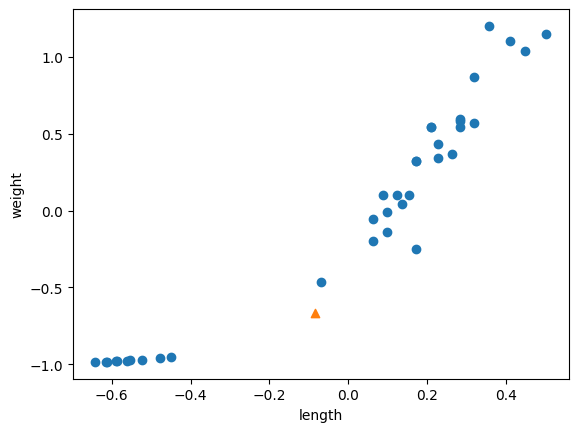

In [16]:
# 동일한 기준으로 예측 데이터를 조정한다
new = ([25, 150] - mean) / std
plt.scatter(train_scaled[:,0], train_scaled[:,1])
plt.scatter(new[0], new[1], marker = '^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [18]:
#바꾼 상태에서 k-최근접 이웃 훈련 다시 진행
kn.fit(train_scaled, train_target)

#test 셋도 변경
test_scaled = (test_input - mean) / std

In [19]:
# 결과값 예측
print(kn.predict([new]))

[1.]
